In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

In [2]:
def qq(key):
    #f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")
    qq = f[f"kkmc_ee_uu_ecm91p2/{key}"].to_hist()+ f[f"kkmc_ee_dd_ecm91p2/{key}"].to_hist()+f[f"kkmc_ee_cc_ecm91p2/{key}"].to_hist() +f[f"kkmc_ee_ss_ecm91p2/{key}"].to_hist() + f[f"kkmc_ee_bb_ecm91p2/{key}"].to_hist()
    return qq

In [3]:
def plot(number,samples,key,name,xlabel_name,ylabel_name = "Events",legend_loc = "best",stack_yn = True,fill_yn = "fill", lim = None, yscale_yn = True, save = False):
    
    histograms = []
    labels = []
    colors = []
    
    sample_dict = {"wzp_qq": "wzp6_ee_qq_ecm91p2", "mu": "wzp6_ee_mumu_ecm91p2", "tau": "wzp6_ee_tautau_ecm91p2", "e": "p8_ee_Zee_ecm91", "gaga":"wzp6_gaga_qq_5_ecm91p2","p8_mu": "p8_ee_Zmumu_ecm91", "p8_tau": "p8_ee_Ztautau_ecm91", "uu": "kkmc_ee_uu_ecm91p2", "dd": "kkmc_ee_dd_ecm91p2", "cc": "kkmc_ee_cc_ecm91p2", "ss": "kkmc_ee_ss_ecm91p2", "bb": "kkmc_ee_bb_ecm91p2"}
    label_dict = {"qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, KKMC", "wzp_qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, Whizard", "mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Whizard", "tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Whizard", "e": r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$, Pythia", "gaga":r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons, Whizard","p8_mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Pythia", "p8_tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Pythia", "uu": r"$e^{+} e^{-} \rightarrow u \bar{u}$, KKMC", "dd": r"$e^{+} e^{-} \rightarrow d \bar{d}$, KKMC", "cc": r"$e^{+} e^{-} \rightarrow c \bar{c}$, KKMC", "ss": r"$e^{+} e^{-} \rightarrow s \bar{s}$, KKMC", "bb": r"$e^{+} e^{-} \rightarrow b \bar{b}$, KKMC"}
    color_dict = {"qq": "paleturquoise", "wzp_qq": "darkviolet", "mu": "red", "tau": "limegreen", "e": "yellow", "gaga":"pink","p8_mu": "sandybrown", "p8_tau": "darkolivegreen", "uu": "moccasin", "dd": "chocolate", "cc": "magenta", "ss": "palegreen", "bb": "deepskyblue"}
                   
    for i in range (0,number):
        if samples[i] == "qq":
            histograms.append(qq(key))
        else:
            histograms.append(f[f"{sample_dict[samples[i]]}/{key}"].to_hist())
        labels.append(f"{label_dict[samples[i]]}")
        colors.append(f"{color_dict[samples[i]]}")
                   
    hep.histplot(histograms, label = labels, color = colors, stack = stack_yn, histtype = fill_yn)
                   
    if yscale_yn:
        plt.yscale("log")
    if lim != None:
        plt.xlim(lim[0],lim[1])
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.legend(loc = legend_loc)
    plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
    plt.title("FCC-ee simulation", loc = "left", weight = "bold")
                   
    if save:
        plt.savefig(f"images/{name}.png")

Text(0.0, 1.0, 'FCC-ee simulation')

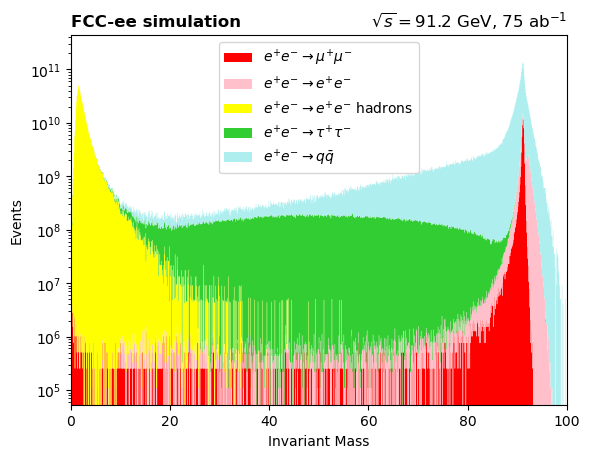

In [4]:
mass_wzp = f['wzp6_ee_qq_ecm91p2/mass_inv;1'].to_hist()
mass = qq("mass_inv")
mu_mass = f['wzp6_ee_mumu_ecm91p2/mass_inv;1'].to_hist()
e_mass = f["p8_ee_Zee_ecm91/mass_inv"].to_hist()
tau_mass = f['wzp6_ee_tautau_ecm91p2/mass_inv;1'].to_hist()
gaga_mass = f['wzp6_gaga_qq_5_ecm91p2/mass_inv;1'].to_hist()

hep.histplot([mu_mass,e_mass, gaga_mass, tau_mass, mass], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                      r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])

plt.xlim(0,100)
plt.yscale("log")
plt.xlabel("Invariant Mass")
plt.legend(loc = "upper center")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_all_inv_mass.png")

Text(0.0, 1.0, 'FCC-ee simulation')

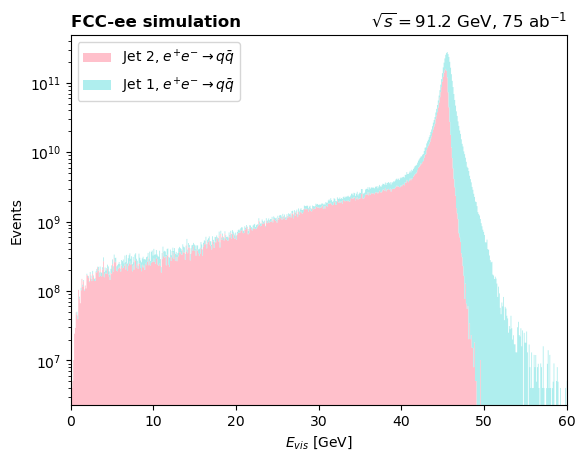

In [5]:
e1 = qq("e1")
e2 = qq("e2")

hep.histplot([e2,e1], label = [r"Jet 2, $e^{+} e^{-} \rightarrow q \bar{q}$", r"Jet 1, $e^{+} e^{-} \rightarrow q \bar{q}$"], stack = True, histtype = "fill", color = ["pink", "paleturquoise"])

plt.yscale("log")
plt.xlim(0,60)
plt.xlabel(r"$E_{vis}$ [GeV]")
plt.legend(loc = "upper left")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_jetsqq_evis.png")

Text(0.0, 1.0, 'FCC-ee simulation')

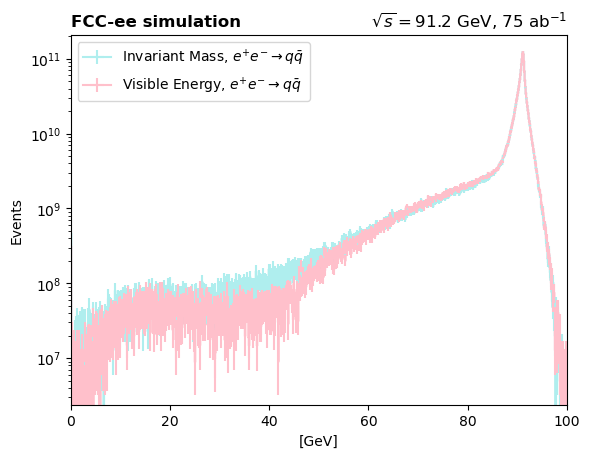

In [6]:
m = qq("dijet_m")
evis = qq("sum_energy")

hep.histplot([mass,evis], color = ["paleturquoise","pink"],label = [r"Invariant Mass, $e^{+} e^{-} \rightarrow q \bar{q}$",r"Visible Energy, $e^{+} e^{-} \rightarrow q \bar{q}$"])
plt.yscale("log")
plt.xlim(0,100)
plt.xlabel("[GeV]")
plt.legend(loc = "upper left")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/evis_vs_inv_mass.png")

Text(0.5, 0, 'Visible Energy [GeV]')

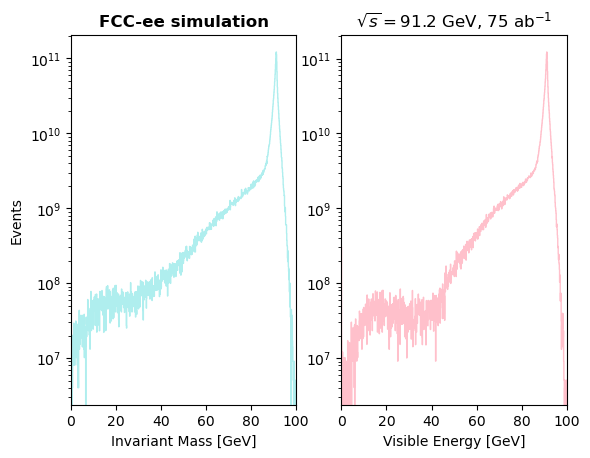

In [7]:
mass_y,mass_x = mass.to_numpy()
evis_y,evis_x = evis.to_numpy()


fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$")
ax1.stairs(mass_y,mass_x, color = "paleturquoise",label = r"Invariant Mass, $e^{+} e^{-} \rightarrow q \bar{q}$")
ax1.set_yscale("log")
ax1.set_xlim(0,100)
ax1.set_xlabel("Invariant Mass [GeV]")
ax1.set_ylabel("Events")

ax1.set_title("FCC-ee simulation", weight = "bold")
ax2.stairs(evis_y,evis_x, color = "pink",label = "Visible Energy, $e^{+} e^{-} \rightarrow q \bar{q}$")
ax2.set_yscale("log")
ax2.set_xlim(0,100)
ax2.set_xlabel("Visible Energy [GeV]")

#plt.savefig("images/kkmc_sidecomp_evis_vs_inv_mass.png")

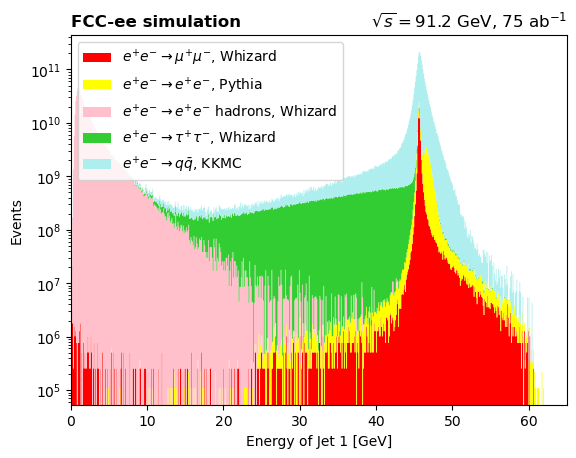

In [27]:
plot(5,["mu","e","gaga","tau","qq"],"e1","all_e1","Energy of Jet 1 [GeV]", legend_loc = "upper left", stack_yn = True,lim = [0,65], fill_yn = "fill", save = True)




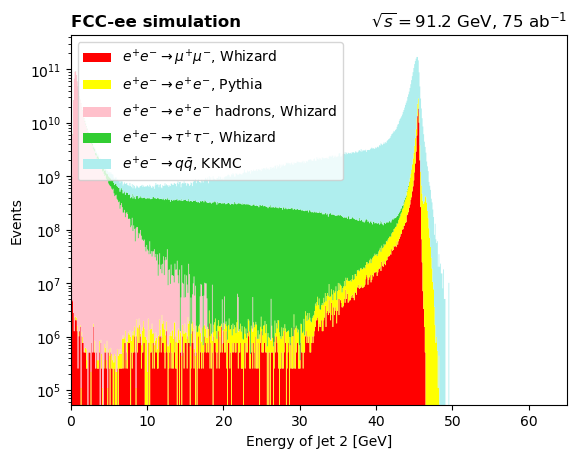

In [26]:
plot(5,["mu","e","gaga","tau","qq"],"e2","all_e2","Energy of Jet 2 [GeV]", legend_loc = "upper left", stack_yn = True,lim = [0,65], fill_yn = "fill", save = True)


